In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from matplotlib.ticker import AutoMinorLocator,FormatStrFormatter
import seaborn as sns
import scipy
import numpy as np
import scipy.stats as stats
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Util Functions

In [6]:
def nanoz2df(nanoz_path):
    imp_lst = [] 
    for count, d in enumerate([x for x in os.walk(nanoz_path)]):
        for file in d[2]:
            if file != ".DS_Store" and ".csv" not in file :
                path = d[0] + "/" +file
                print(path)
                with open(path, 'rb') as f:
                    imp_tmp = []
                    for count, line in enumerate(f):
                        # Skip first two lines and last line in the txt file
                        if count > 2 and count!=35:
                            imp_tmp.append(str(line)[2:].split("\\t")[:-1])
                    f.close()
                imp_tmp = [list(map(float, x)) for x in imp_tmp]
                imp_lst = imp_lst + imp_tmp

                       
    imp_df = pd.DataFrame(imp_lst, columns=['Channel','Impedance_1000kHz', 'Phase_1kHz'])
    imp_df["Impedance_1000kHz"] = imp_df["Impedance_1000kHz"].apply(lambda x: x*1e3)
    imp_df["Enabled"] = np.ones(len(imp_df))
    return(imp_df)

In [7]:
def nanozEIS(nanoz_path):
    columns=['Ch','Imp_10Hz', 'Ph_10Hz','Imp_20Hz', 'Ph_20Hz',
             'Imp_50Hz', 'Ph_50Hz','Imp_100Hz', 'Ph_100Hz',
             'Imp_200Hz', 'Ph_200Hz','Imp_500Hz', 'Ph_500Hz',
             'Imp_1000Hz', 'Ph_1000Hz','Imp_2000Hz', 'Ph_2000Hz',
             'Imp_5000Hz', 'Ph_5000Hz','Imp_10000Hz', 'Ph_10000Hz'
            ]
    imp_lst = [] 
    for count, d in enumerate([x for x in os.walk(nanoz_path)]):
        for file in d[2]:
            if file != ".DS_Store" and ".csv" not in file :
                path = d[0] + "/" +file
                print(path)
                with open(path, 'rb') as f:
                    imp_tmp = []
                    for count, line in enumerate(f):
                        # Skip first two lines and last line in the txt file
                        if count > 2 and count!=35:
                            imp_tmp.append(str(line)[2:].split("\\t")[:-1])
                    f.close()
                imp_tmp = [list(map(float, x)) for x in imp_tmp]
                imp_lst = imp_lst + imp_tmp

                       
    imp_df = pd.DataFrame(imp_lst, columns=columns)
#     imp_df["Impedance_1000kHz"] = imp_df["Impedance_1000kHz"].apply(lambda x: x*1e3)
    imp_df["Enabled"] = np.ones(len(imp_df))
    return(imp_df)

In [8]:
def nan_handler(df):
    df_mean=df.mean()[1]
    df.fillna(value=df_mean)
    return(df)

# Plot impedances

In [9]:
ionp_path="./data/impedances/ozdas64-007/d05/"

df=nanozEIS(ionp_path)
df=df[df["Imp_1000Hz"]<0.2]

./data/impedances/ozdas64-007/d05//ozdas64-007-back-eis-d05.txt
./data/impedances/ozdas64-007/d05//ozdas64-007-front-eis-d05.txt


In [10]:
df

,Ch,Imp_10Hz,Ph_10Hz,Imp_20Hz,Ph_20Hz,Imp_50Hz,Ph_50Hz,Imp_100Hz,Ph_100Hz,Imp_200Hz,...,Ph_500Hz,Imp_1000Hz,Ph_1000Hz,Imp_2000Hz,Ph_2000Hz,Imp_5000Hz,Ph_5000Hz,Imp_10000Hz,Ph_10000Hz,Enabled
0,33.0,2.157,-88.3,1.088,-88.1,0.440,-87.2,0.222,-85.3,0.113,...,-73.1,0.027,-59.3,0.018,-42.7,0.015,-23.0,0.027,-26.4,1.0
1,34.0,2.165,-88.3,1.090,-88.2,0.439,-86.8,0.222,-85.3,0.113,...,-73.6,0.027,-59.2,0.018,-42.7,0.016,-22.8,0.026,-28.2,1.0
2,35.0,4.959,-88.3,2.487,-88.4,1.005,-87.3,0.507,-85.8,0.257,...,-75.1,0.059,-62.6,0.038,-46.2,0.030,-24.4,0.055,-24.6,1.0
3,36.0,4.898,-88.1,2.462,-88.2,0.995,-87.0,0.502,-85.0,0.255,...,-71.5,0.062,-57.3,0.043,-39.8,0.037,-21.3,0.065,-20.7,1.0
4,37.0,4.890,-88.1,2.455,-88.3,0.996,-87.1,0.501,-85.6,0.253,...,-74.6,0.059,-62.3,0.038,-45.3,0.032,-23.7,0.053,-23.0,1.0
5,38.0,4.715,-88.2,2.368,-88.3,0.960,-87.3,0.483,-85.6,0.244,...,-74.3,0.057,-61.6,0.037,-45.1,0.031,-24.4,0.053,-25.1,1.0
6,39.0,4.799,-88.2,2.410,-88.4,0.977,-87.2,0.491,-85.7,0.249,...,-74.9,0.058,-62.7,0.037,-45.2,0.031,-24.4,0.055,-25.2,1.0
8,41.0,4.707,-88.2,2.365,-88.3,0.958,-87.1,0.483,-85.6,0.244,...,-74.2,0.057,-62.0,0.037,-44.8,0.030,-23.3,0.052,-24.3,1.0
9,42.0,4.764,-88.1,2.393,-88.3,0.967,-87.2,0.488,-85.4,0.247,...,-73.6,0.058,-60.5,0.039,-42.7,0.032,-21.8,0.056,-22.5,1.0
10,43.0,4.745,-88.2,2.384,-88.3,0.965,-87.4,0.486,-85.8,0.246,...,-75.2,0.057,-63.2,0.036,-46.7,0.029,-25.8,0.053,-26.2,1.0


In [11]:
mean_imp=[]
std_imp=[]
mean_phs=[]
std_phs=[]
freq=[]
for column in df.columns:
    if "Imp" in column:
        mean_imp.append(df[column].mean()*1e4)
        std_imp.append(df[column].std()*1e4)
        freq.append(int(column.split("_")[1].split("Hz")[0]))
    if "Ph" in column:
        mean_phs.append(-df[column].mean())
        std_phs.append(df[column].std())

/opt/anaconda3/envs/MRI_reg/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


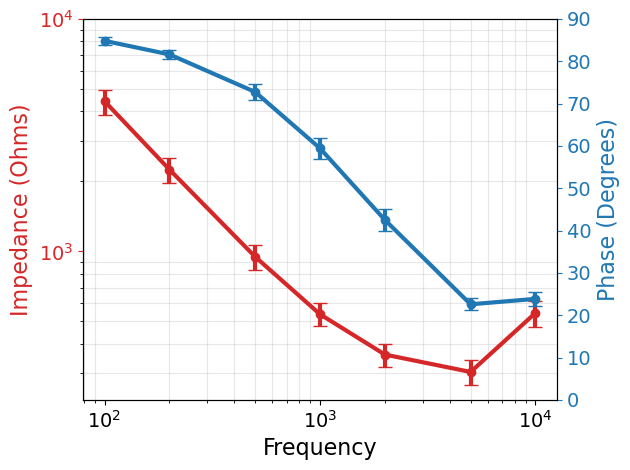

In [12]:
# plt.plot(freq, mean_imp)
# plt.plot(freq, mean_phs)


fig, ax1 = plt.subplots()
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=8)

color = 'tab:red'
color2='tab:blue'
ax1.tick_params(axis='y', colors=color)
ax1.set_xlabel('Frequency', fontsize=16)
ax1.set_ylabel('Impedance (Ohms)', fontsize=16, color=color)
# ax1.plot(df["Cycles"],df["Impedance"]/1000, linewidth=3, color=color)
ax1.errorbar(freq[3:], mean_imp[3:], yerr=std_imp[3:], fmt="-o", color=color, linewidth=3, capsize=5)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylim([0,1e4])

# ax1.legend(["13um 1uA","13um 1uA fit", "10um 0.1uA", "10um 0.1uA fit", "20um 1uA", "20um 1uA fit"])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.tick_params(axis='y', colors=color)
ax2.set_ylabel('Phase (Degrees)', fontsize=16, color=color)  # we already handled the x-label with ax1
# ax2.plot(df["Cycles"], df["Phase"], linewidth=3,  color=color)
ax2.errorbar(freq[3:], mean_phs[3:], yerr=std_phs[3:], fmt="-o", color=color, linewidth=3, capsize=5)

ax2.set_ylim([0,90])

for label in ax2.yaxis.get_majorticklabels():
    label.set_fontsize(14) 
# ax1.grid()
# ax2.grid()
# plt.grid()
ax1.grid(which='minor', alpha=0.3)
# # # ax2.fill_between(cyc_20um, phs_20um-phs_20um_err, phs_20um+phs_20um_err, alpha=0.1, color=color)
# # ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("./ionp-eis.pdf")

In [5]:
ionp_path="./impedance-measurements/rEO_05/perfusion/ionp"
normal_path="./impedance-measurements/rEO_05/perfusion/normal/"

ionp_df=nanoz2df(ionp_path)
normal_df=nanoz2df(normal_path)

./impedance-measurements/rEO_05/perfusion/ionp/rEO_05-nanoz_right_backside_omnetics-facing-midline.txt
./impedance-measurements/rEO_05/perfusion/ionp/rEO_05-nanoz_right_frontside_omnetics-facing-midline.txt
./impedance-measurements/rEO_05/perfusion/normal//rEO_05-nanoz_left_backside_omnetics-facing-midline.txt
./impedance-measurements/rEO_05/perfusion/normal//rEO_05-nanoz_left_frontside_omnetics-facing-midline.txt


In [6]:
#Handling the dead channels
thr=300

ionp_df=ionp_df[ionp_df<thr]
normal_df=normal_df[normal_df<thr]

ionp_mean=ionp_df.mean()[1]
ionp_std=ionp_df.std()[1]
normal_mean=normal_df.mean()[1]
normal_std=normal_df.std()[1]

ionp_df=ionp_df.fillna(value=ionp_mean)
normal_df=normal_df.fillna(value=normal_mean)


In [7]:
ionp_df

,Channel,Impedance_1000kHz,Phase_1kHz,Enabled
0,33.0,111.0,-80.3,1.0
1,34.0,96.0,-59.6,1.0
2,35.0,84.0,-50.9,1.0
3,36.0,107.0,-64.3,1.0
4,37.0,111.0,-83.0,1.0
...,...,...,...,...
59,60.0,76.0,-42.4,1.0
60,61.0,72.0,-39.1,1.0
61,62.0,150.0,-43.4,1.0
62,63.0,80.0,-43.5,1.0


In [8]:
comparison_df=pd.DataFrame()
comparison_df["IONP"] = ionp_df["Impedance_1000kHz"]
comparison_df["Normal"] = normal_df["Impedance_1000kHz"]
comparison_df

,IONP,Normal
0,111.0,42.000000
1,96.0,106.880952
2,84.0,68.000000
3,107.0,106.880952
4,111.0,66.000000
...,...,...
59,76.0,143.000000
60,72.0,226.000000
61,150.0,170.000000
62,80.0,106.880952


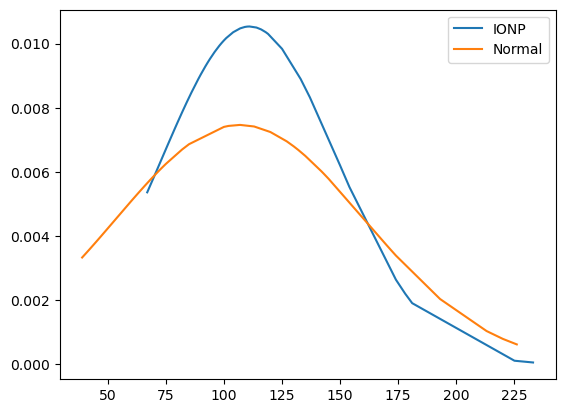

In [23]:
pdf = stats.norm.pdf(comparison_df["IONP"].sort_values(), ionp_mean, ionp_std)
pdf2 = stats.norm.pdf(comparison_df["Normal"].sort_values(), normal_mean, normal_std)

fig, ax = plt.subplots()
line1, =ax.plot(comparison_df["IONP"].sort_values(), pdf , label='Line 1')
line2, =ax.plot(comparison_df["Normal"].sort_values(), pdf2, label='Line 1')
ax.legend([line1, line2], ['IONP', 'Normal'])
fig.savefig("./impedance-measurements/rEO_05/4m_impedances.svg")

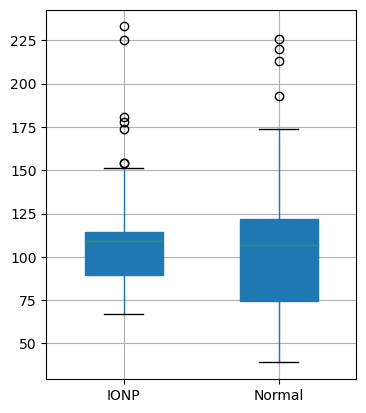

In [46]:
fig, ax = plt.subplots()
colors = ['pink', 'lightblue']
ax=comparison_df.boxplot(patch_artist=True, widths=(0.5,0.5))
fig.set_figwidth(4)
fig.savefig("./impedance-measurements/rEO_05/4m_impedances_boxplot.svg")

In [5]:
ionp_eis1='./impedance-measurements/ozdas64-007/d05/ozdas64-007-back-eis-d05.txt'
ionp_eis2='./impedance-measurements/ozdas64-007/d05/ozdas64-007-front-eis-d05.txt'

In [6]:
df_eis1=nanozEIS(ionp_eis1)

In [7]:
df_eis1

,Ch,Imp_10Hz,Ph_10Hz,Imp_20Hz,Ph_20Hz,Imp_50Hz,Ph_50Hz,Imp_100Hz,Ph_100Hz,Imp_200Hz,...,Ph_500Hz,Imp_1000Hz,Ph_1000Hz,Imp_2000Hz,Ph_2000Hz,Imp_5000Hz,Ph_5000Hz,Imp_10000Hz,Ph_10000Hz,Enabled


In [30]:
stats.ttest_ind(pdf, pdf2)

Ttest_indResult(statistic=6.010239287553506, pvalue=1.8575027770014747e-08)

In [32]:
stats.ttest_ind(comparison_df["IONP"], comparison_df["Normal"], equal_var=False)

Ttest_indResult(statistic=0.6019879808090516, pvalue=0.548326267946031)